In [1]:
!pip install yfinance

In [6]:
import numpy as np
from pylab import plt
import math
import pandas as pd

In [74]:
# import yfinance as yf
# assets = ['BTC-USD','AAPL','MSFT','META']

# df = yf.download(assets, start="2019-01-01", end="2023-05-05")
# print('currency:', currency_list)
# data = yf.download(stock_list, start="2015-01-01", end="2020-02-21")
# BNBUSDT = pd.read_csv("BNBUSDT-1d.csv", parse_dates=["Date"], index_col="Date")
BTCUSDT = pd.read_csv("BTCUSDT-1d.csv", parse_dates=["Date"], index_col="Date")
ETHUSDT = pd.read_csv("ETHUSDT-1d.csv", parse_dates=["Date"], index_col="Date")
LTCUSDT = pd.read_csv("LTCUSDT-1d.csv", parse_dates=["Date"], index_col="Date")
TRXUSDT = pd.read_csv("TRXUSDT-1d.csv", parse_dates=["Date"], index_col="Date")
XRPUSDT = pd.read_csv("XRPUSDT-1d.csv", parse_dates=["Date"], index_col="Date")

In [75]:
Date = "2019-01-01"
prices = pd.DataFrame(columns=["BTCUSDT","ETHUSDT","LTCUSDT","TRXUSDT","XRPUSDT"])
# pd.DataFrame([BNBUSDT["Close"].loc["2019-01-01":], BTCUSDT["Close"].loc["2019-01-01":],
#               ETHUSDT["Close"].loc["2019-01-01":], LTCUSDT["Close"].loc["2019-01-01":],
#               TRXUSDT["Close"].loc["2019-01-01":], XRPUSDT["Close"].loc["2019-01-01":]],
#              columns=["BNBUSDT","BTCUSDT","ETHUSDT","LTCUSDT","TRXUSDT","XRPUSDT"])
# prices["BNBUSDT"] = BNBUSDT["Close"].loc["2019-01-01":]
prices["BTCUSDT"] = BTCUSDT["Close"].loc["2019-01-01":]
prices["ETHUSDT"] = ETHUSDT["Close"].loc["2019-01-01":]
prices["LTCUSDT"] = LTCUSDT["Close"].loc["2019-01-01":]
prices["TRXUSDT"] = TRXUSDT["Close"].loc["2019-01-01":]
prices["XRPUSDT"] = XRPUSDT["Close"].loc["2019-01-01":]

In [76]:
prices

,BTCUSDT,ETHUSDT,LTCUSDT,TRXUSDT,XRPUSDT
Date,,,,,
2019-01-01,3797.14,139.10,31.48,0.01928,0.36080
2019-01-02,3858.56,152.01,32.67,0.01974,0.36882
2019-01-03,3766.78,146.30,31.39,0.01966,0.35240
2019-01-04,3792.01,151.97,31.76,0.02106,0.35308
2019-01-05,3770.96,152.83,34.33,0.02190,0.34851
...,...,...,...,...,...
2023-07-16,30231.99,1922.11,92.89,0.07980,0.74680
2023-07-17,30138.00,1911.20,92.20,0.07997,0.73740
2023-07-18,29859.13,1897.21,91.56,0.07978,0.77790


In [77]:
rets = prices.pct_change()

In [78]:
rets.describe()

,BTCUSDT,ETHUSDT,LTCUSDT,TRXUSDT,XRPUSDT
count,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000
mean,0.001938,0.002723,0.002001,0.002128,0.002142
std,0.036689,0.047201,0.051671,0.050173,0.059251
min,-0.395048,-0.445969,-0.385329,-0.435191,-0.416469
25%,-0.014291,-0.019766,-0.023562,-0.020058,-0.020977
50%,0.000781,0.001540,0.000648,0.002022,0.000530
75%,0.017693,0.025759,0.025876,0.022176,0.020971
max,0.195361,0.263329,0.301496,0.408912,0.730998


In [79]:
assets = len(prices.columns)

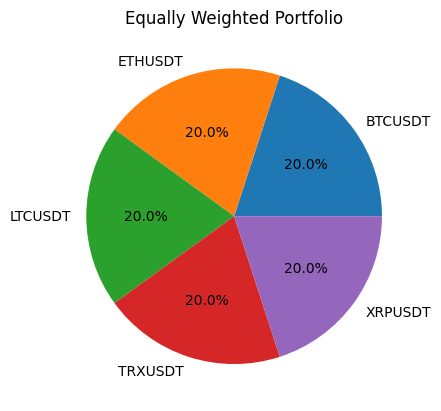

In [81]:
phi = np.array(assets * [1 / assets])
plt.pie(phi, labels=prices.columns, autopct='%1.1f%%')
plt.title('Equally Weighted Portfolio');

In [82]:
cov = rets.cov() * 252
cov

,BTCUSDT,ETHUSDT,LTCUSDT,TRXUSDT,XRPUSDT
BTCUSDT,0.339206,0.359161,0.369925,0.297534,0.311594
ETHUSDT,0.359161,0.561430,0.497713,0.413267,0.435668
LTCUSDT,0.369925,0.497713,0.672811,0.432769,0.478481
TRXUSDT,0.297534,0.413267,0.432769,0.634379,0.450904
XRPUSDT,0.311594,0.435668,0.478481,0.450904,0.884701


In [83]:
def portfolio_return(weights, rets):
    return np.dot(weights.T, rets.mean()) * 252

def portfolio_variance(weights, rets):
    return np.dot(weights.T, np.dot(rets.cov(), weights)) * 252

def portfolio_volatility(weights, rets):
    return math.sqrt(portfolio_variance(weights, rets))

In [85]:
vol = portfolio_volatility(phi, rets)
vol

0.6689261778207111

In [111]:
noa = 5
vol / noa  # "average" risk contribution

0.1337852355641422

In [112]:
np.dot(cov, phi)

array([0.33548378, 0.45344771, 0.49033965, 0.44577034, 0.51226968])

In [113]:
mvols = np.dot(cov, phi) / vol  # marginal volatilities
mvols

array([0.50152587, 0.67787406, 0.73302506, 0.66639691, 0.76580899])

In [114]:
rc = mvols * phi  # risk contributions (%-points)
rc

array([0.10030517, 0.13557481, 0.14660501, 0.13327938, 0.1531618 ])

In [115]:
rc.sum()

0.6689261778207111

In [116]:
rrc = rc / rc.sum()  # relative risk contributions (%)
rrc

array([0.14994954, 0.2026753 , 0.21916471, 0.19924378, 0.22896667])

In [117]:
rrc.sum()

0.9999999999999999

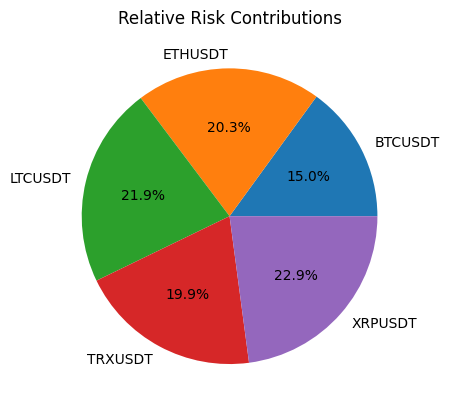

In [118]:
plt.pie(rrc, labels=prices.columns, autopct='%1.1f%%')
plt.title('Relative Risk Contributions');

In [119]:
from scipy.optimize import minimize

In [120]:
def rel_risk_contributions(weights, rets = rets):
    vol = portfolio_volatility(weights, rets)
    cov = rets.cov()
    mvols = np.dot(cov, weights) / vol
    rc = mvols * weights
    rrc = rc / rc.sum()
    return rrc

In [121]:
rrc = rel_risk_contributions(phi)
rrc

array([0.14994954, 0.2026753 , 0.21916471, 0.19924378, 0.22896667])

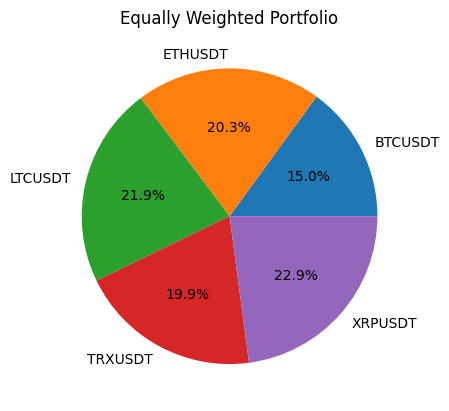

In [122]:
plt.pie(rrc, labels=prices.columns, autopct='%1.1f%%')
plt.title('Equally Weighted Portfolio');

In [123]:
def mse_risk_contributions(weights, target, rets=rets):
    rc = rel_risk_contributions(weights, rets)
    mse = ((rc - target) ** 2).mean()
    return mse * 100

In [124]:
mse_risk_contributions(phi, phi)

0.07438262975933646

In [125]:
bnds = noa * [(0, 1),]

In [126]:
cons = {'type': 'eq', 'fun': lambda weights: weights.sum() - 1}

In [127]:
target = noa * [1 / noa,]  # risk parity as target
# target = [0.2, 0.2, 0.2, 0.4]  # example risk budget as target
target

[0.2, 0.2, 0.2, 0.2, 0.2]

In [128]:
opt = minimize(lambda w: mse_risk_contributions(w, target=target),
               phi, bounds=bnds, constraints=cons)

In [129]:
opt

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 3.1897867644289233e-07
       x: [ 2.565e-01  1.925e-01  1.793e-01  1.969e-01  1.747e-01]
     nit: 6
     jac: [-1.788e-03 -3.651e-03  2.287e-03  1.001e-03  3.175e-03]
    nfev: 44
    njev: 6

In [130]:
phi_ = opt['x']

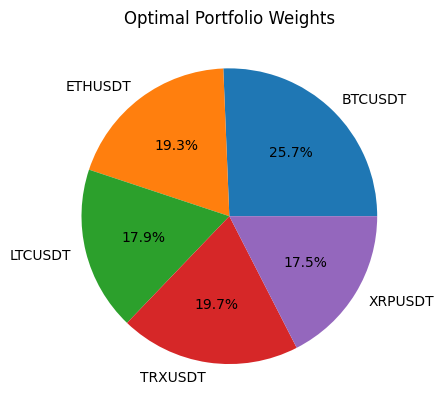

In [131]:
plt.pie(phi_, labels=prices.columns, autopct='%1.1f%%')
plt.title('Optimal Portfolio Weights');

In [137]:
risk_parity = {
    "BTCUSDT": 0.257,
    "ETHUSDT": 0.193,
    "LTCUSDT": 0.170,
    "XRPUSDT": 0.175,
    "TRXUSDT": 0.197,
}

In [133]:
import json

In [139]:
with open('risk_parity.json', 'w') as fp:
    json.dump(risk_parity, fp)